In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_style(style="whitegrid")

In [7]:
df = pd.read_csv("../data/churn.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [8]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

## EDA

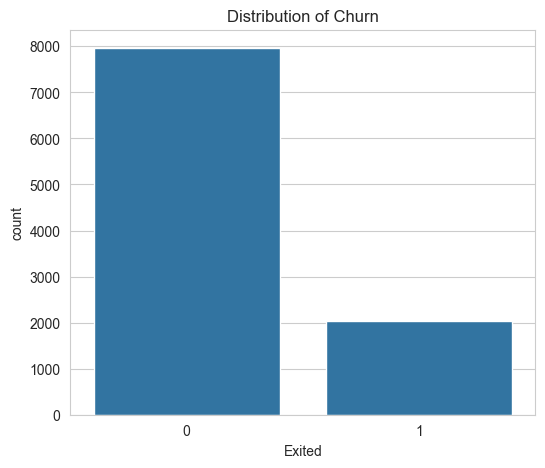

In [9]:
plt.figure(figsize=(6, 5), dpi=100)
sns.countplot(data=df, x="Exited")
plt.title("Distribution of Churn")
plt.show()

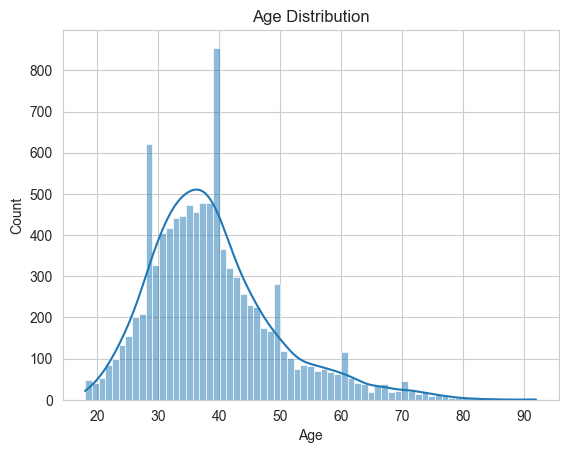

In [10]:
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")
plt.show()

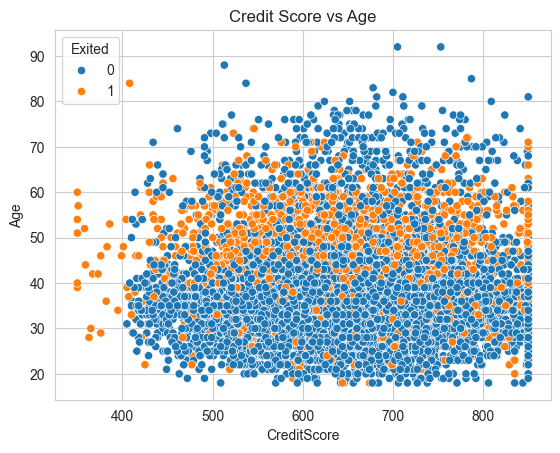

In [11]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Credit Score vs Age")
plt.show()

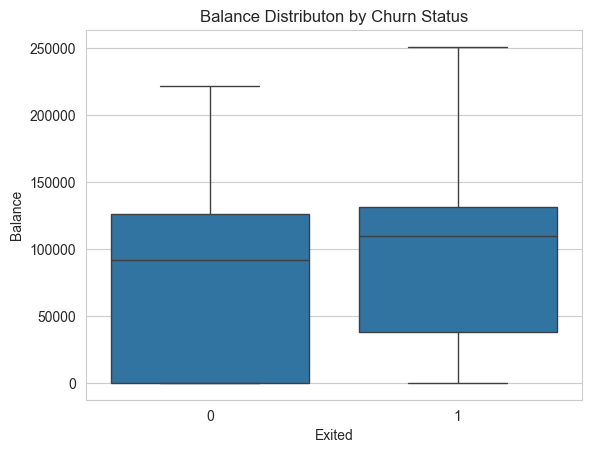

In [12]:
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title("Balance Distributon by Churn Status")
plt.show()

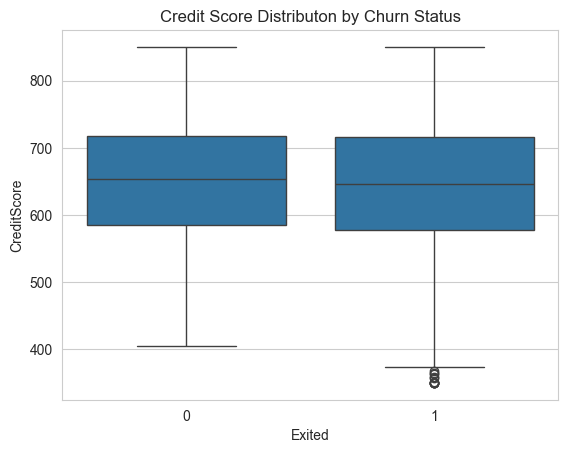

In [13]:
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("Credit Score Distributon by Churn Status")
plt.show()

## Train-Test Split

In [14]:
features = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
print(features.shape)
features.head()

(10000, 10)


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [15]:
target = df["Exited"]
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
features = pd.get_dummies(features, columns=["Geography", "Gender"])
print(features.shape)
features.head()

(10000, 13)


CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        101348.88              True              False   
1               1        112542.58             False              False   
2               0        113931.57              True              False   
3               0         93826.63              True              False   
4               1         79084.10             False              False   

   Geography_Spain  Gender_Female  Gender_Male  
0            False           True        False  
1             True           True        False  
2            False           True        False  
3            False           True        False  
4             True           True        False

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Pre-Processing

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

## Train Model

In [19]:
import platform
print(platform.architecture())

import sys
print(sys.executable)


('64bit', '')
/Users/matteo/miniconda3/envs/headstarter/bin/python


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [21]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.811

In [24]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:]n{classification_report(y_test, y_pred)}")
    
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    
    print(f"Model saved as {filename}")

In [27]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "../models/xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "../models/dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "../models/rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "../models/nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "../models/knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "../models/svm_model.pkl")

XGBClassifier Accuracy: 0.7455

Classification Report:]n              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1607
           1       0.39      0.54      0.45       393

    accuracy                           0.75      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.75      0.76      2000

Model saved as ../models/xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7850

Classification Report:]n              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

Model saved as ../models/dt_model.pkl
RandomForestClassifier Accuracy: 0.8670

Classification Report:]n              precision    recall  f1-score   support

           0       0.88     

## Feature importance

In [55]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

feature_importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
})

feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

feature_importances_df

feature  importance
16     AgeGroup_Senior    0.454442
12         Gender_Male    0.116784
6       IsActiveMember    0.079248
15  AgeGroup_MiddleAge    0.056476
17    AgeGroup_Elderly    0.053826
4        NumOfProducts    0.045817
11       Gender_Female    0.044092
9    Geography_Germany    0.037684
8     Geography_France    0.030650
10     Geography_Spain    0.026470
1                  Age    0.009174
3              Balance    0.008910
5            HasCrCard    0.008751
13                 CLV    0.007312
2               Tenure    0.005470
7      EstimatedSalary    0.005249
0          CreditScore    0.004962
14      TenureAgeRatio    0.004682

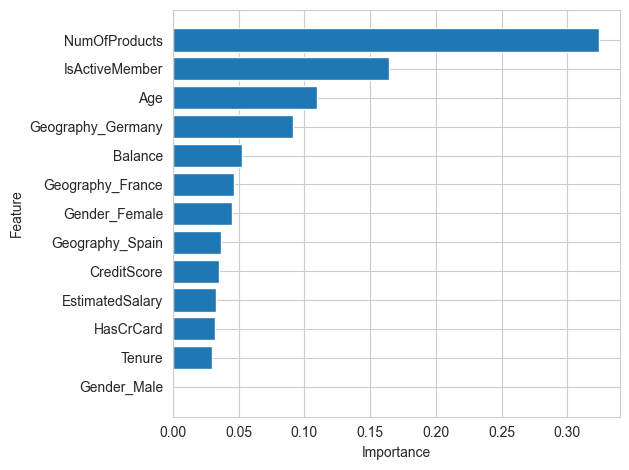

In [43]:
plt.barh(feature_importances_df["feature"], feature_importances_df["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Feature Engineering

In [46]:
features["CLV"] = df["Balance"] * df["EstimatedSalary"] / 100_000
features["AgeGroup"] = pd.cut(df["Age"], bins=[0, 30, 45, 60, 100], labels=["Young", "MiddleAge", "Senior", "Elderly"])
features["TenureAgeRatio"] = df["Tenure"] / df["Age"]

features = pd.get_dummies(features, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "../models/xgb_model_feature_eng.pkl")

XGBClassifier Accuracy: 0.8540

Classification Report:]n              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

Model saved as ../models/xgb_model_feature_eng.pkl


## SMOTE

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "../models/xgb_model_smote.pkl")

XGBClassifier Accuracy: 0.8545

Classification Report:]n              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000

Model saved as ../models/xgb_model_smote.pkl


## Ensemble

In [53]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("xgboost", xgb.XGBClassifier(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svm", SVC(random_state=42, probability=True))
    ],
    voting="soft"
)

In [54]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "../models/voting_clf.pkl")

VotingClassifier Accuracy: 0.8635

Classification Report:]n              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1607
           1       0.69      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000

Model saved as ../models/voting_clf.pkl


## Appendix